In [82]:
from datetime import datetime
import pandas as pd
import os                                     

In [94]:
df = pd.read_csv('Bitfinex_BTCEUR_trades_2018_02_02.csv')
#print(df.shape)
df.index = pd.to_datetime(df['date'])
#print(df)
#pd.ewma(df['price'], span = 15715, freq = "D")

In [100]:
import pandas as pd
import numpy as np

alpha = 0.55
x = df['price']
def ewma(x, alpha):
    '''
    Returns the exponentially weighted moving average of x.

    Parameters:
    -----------
    x : array-like
    alpha : float {0 <= alpha <= 1}

    Returns:
    --------
    ewma : numpy array
        the exponentially weighted moving average
    '''
    # coerce x to an array
    x = np.array(x)
    n = x.size
    # create an initial weight matrix of (1-alpha), and a matrix of powers
    # to raise the weights by
    w0 = np.ones(shape=(n,n)) * (1-alpha) 
    p = np.vstack([np.arange(i,i-n,-1) for i in range(n)])
    # create the weight matrix
    w = np.tril(w0**p,0)
    # calculate the ewma
    return np.dot(w, x[::np.newaxis]) / w.sum(axis=1)

In [105]:
df = pd.DataFrame(x)
expo_moving_avg = df.ewm(alpha=alpha).mean()
df['expo_moving_avg']  = expo_moving_avg 

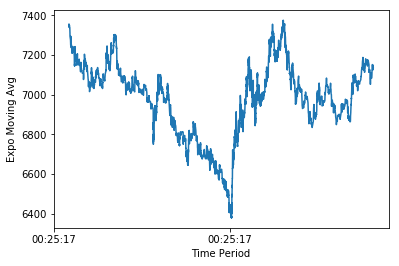

In [111]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(expo_moving_avg)
plt.xlabel('Time Period')
plt.ylabel('Exponential Moving Average')

In [112]:

expo_moving_avg 

,price
date,
1970-01-01 00:25:17.529608,7349.600000
1970-01-01 00:25:17.529609,7353.103759
1970-01-01 00:25:17.529609,7354.057884
1970-01-01 00:25:17.529610,7354.368797
1970-01-01 00:25:17.529626,7348.226746
1970-01-01 00:25:17.529626,7345.775670
1970-01-01 00:25:17.529638,7351.420143
1970-01-01 00:25:17.529638,7354.990067
1970-01-01 00:25:17.529638,7355.435868
